# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

To understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
#Import Libraries

import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#read the data
data = pd.read_csv("day.csv")

In [3]:
print("Shape of the data:", data.shape)
data.head()

Shape of the data: (730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data understanding, preparation and EDA:

- You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
- You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 

### Check for Null values

In [4]:
# check for any missing values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

*Note: No Null values are present*

In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# understand the datatypes of features
categorical_feat = ["season", "yr", "mnth", 
                    "holiday", "weekday", 
                    "workingday", 
                    "weathersit"]

numeric_feat = ["temp", "atemp", "hum", 
                "windspeed", "casual", 
                "registered"]

id_feat = ['instant']

target = "cnt"

In [7]:
data[numeric_feat].describe()

,temp,atemp,hum,windspeed,casual,registered
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000


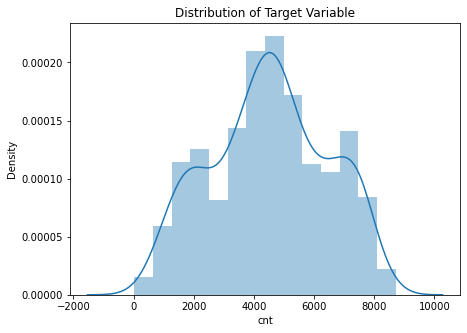

In [8]:
#plot the distribution of target variable "cnt"
plt.figure(figsize=(7,5))
sns.distplot(data[target])
plt.title("Distribution of Target Variable")
plt.show()

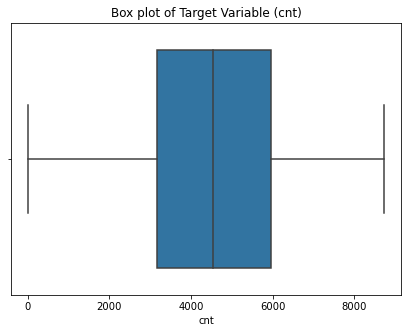

In [9]:
plt.figure(figsize=(7,5))
sns.boxplot(x = 'cnt', data = data)
plt.title("Box plot of Target Variable (cnt)")
plt.show()

### Inspect columns datatypes

In [10]:
# check the dtypesof the features
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Inspect Duplicate records

In [11]:
data[data.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


### Correlation Analysis

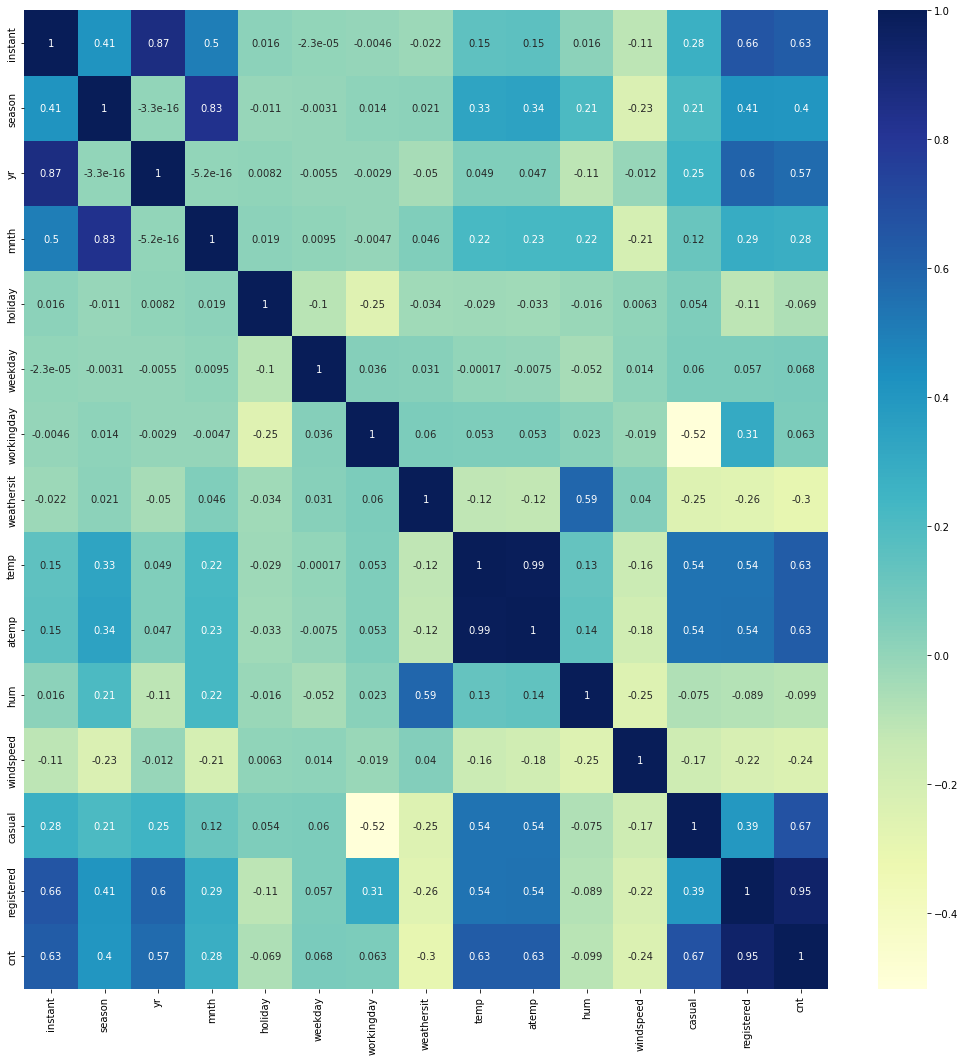

In [12]:
# plotting correlation heatmap
plt.figure(figsize=(18,18))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

Observations
1. registered is highly correlated with target cnt column
2. casual is also having good correlation with the target cnt column
3. instant id feature is correlated with year, registered, cnt
4. season & month are highly correlated
5. temp & atemp features are extremly correlated with 0.99 correlation
6. humidity is correlated with wealthsit
7. temp, atemp is having good correlation with the target feature

### Visualising the Data

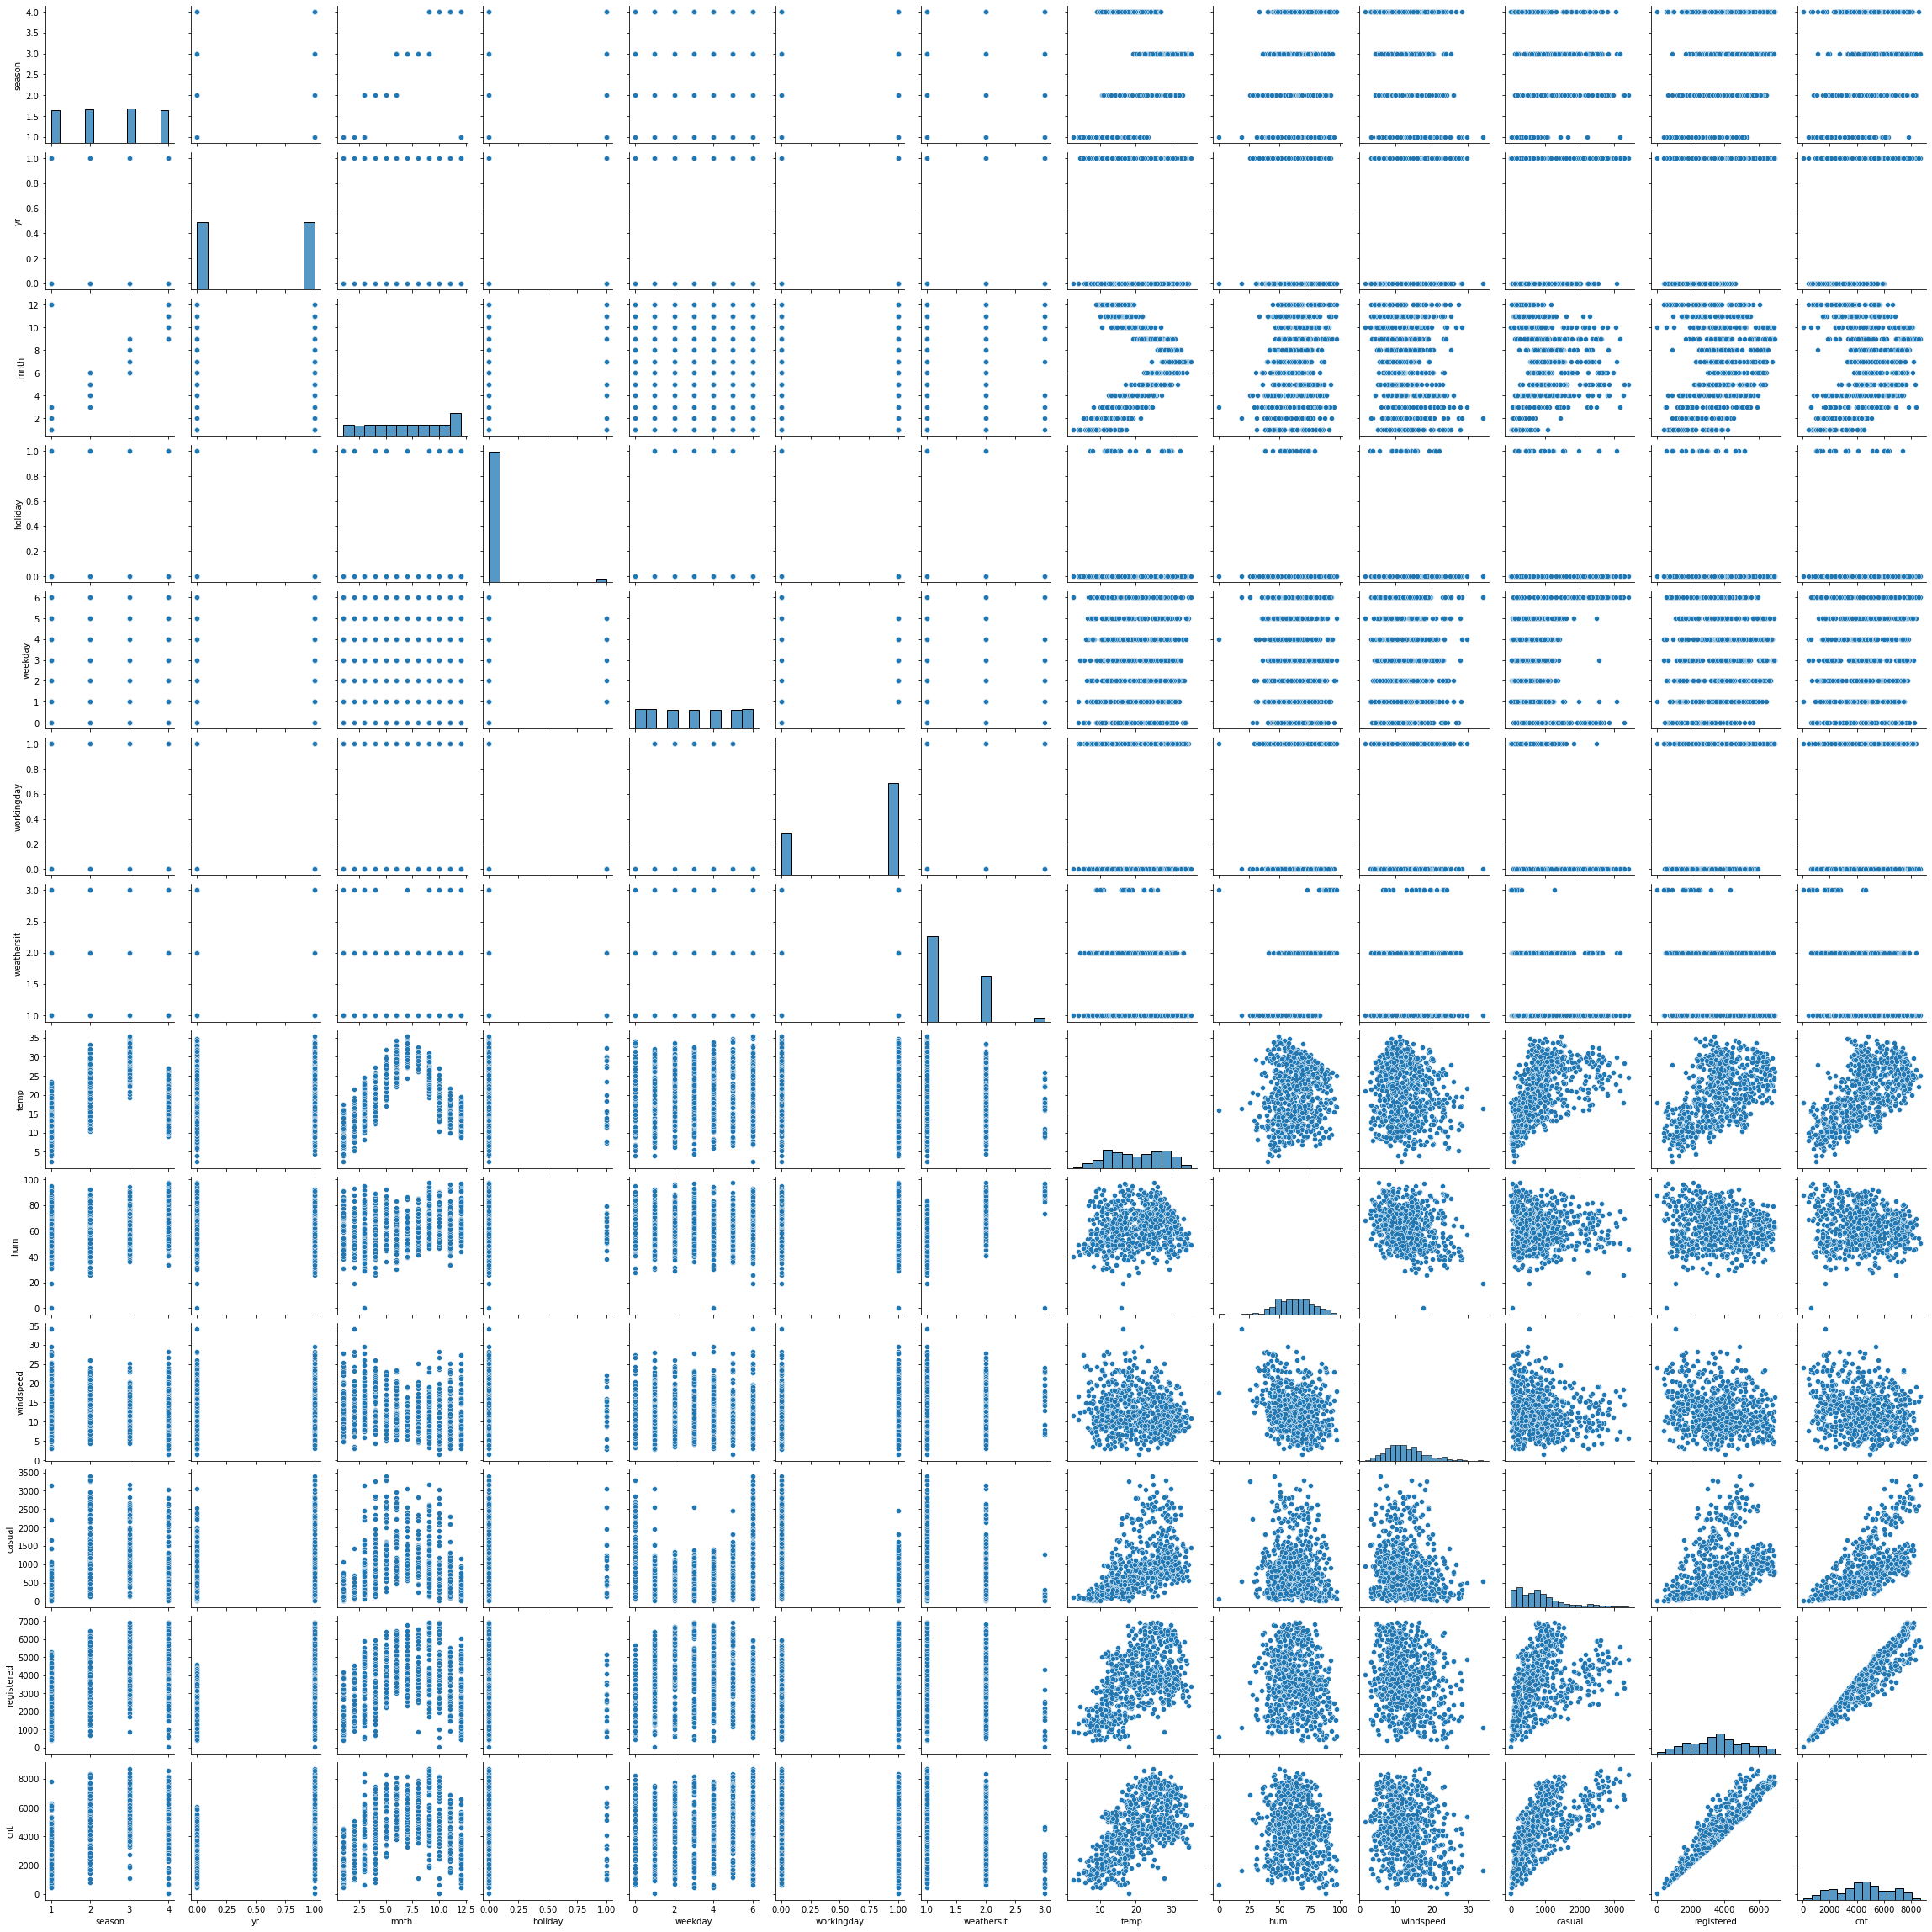

In [13]:
feat = ['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']

#all features
sns.pairplot(data[feat],)
plt.show()

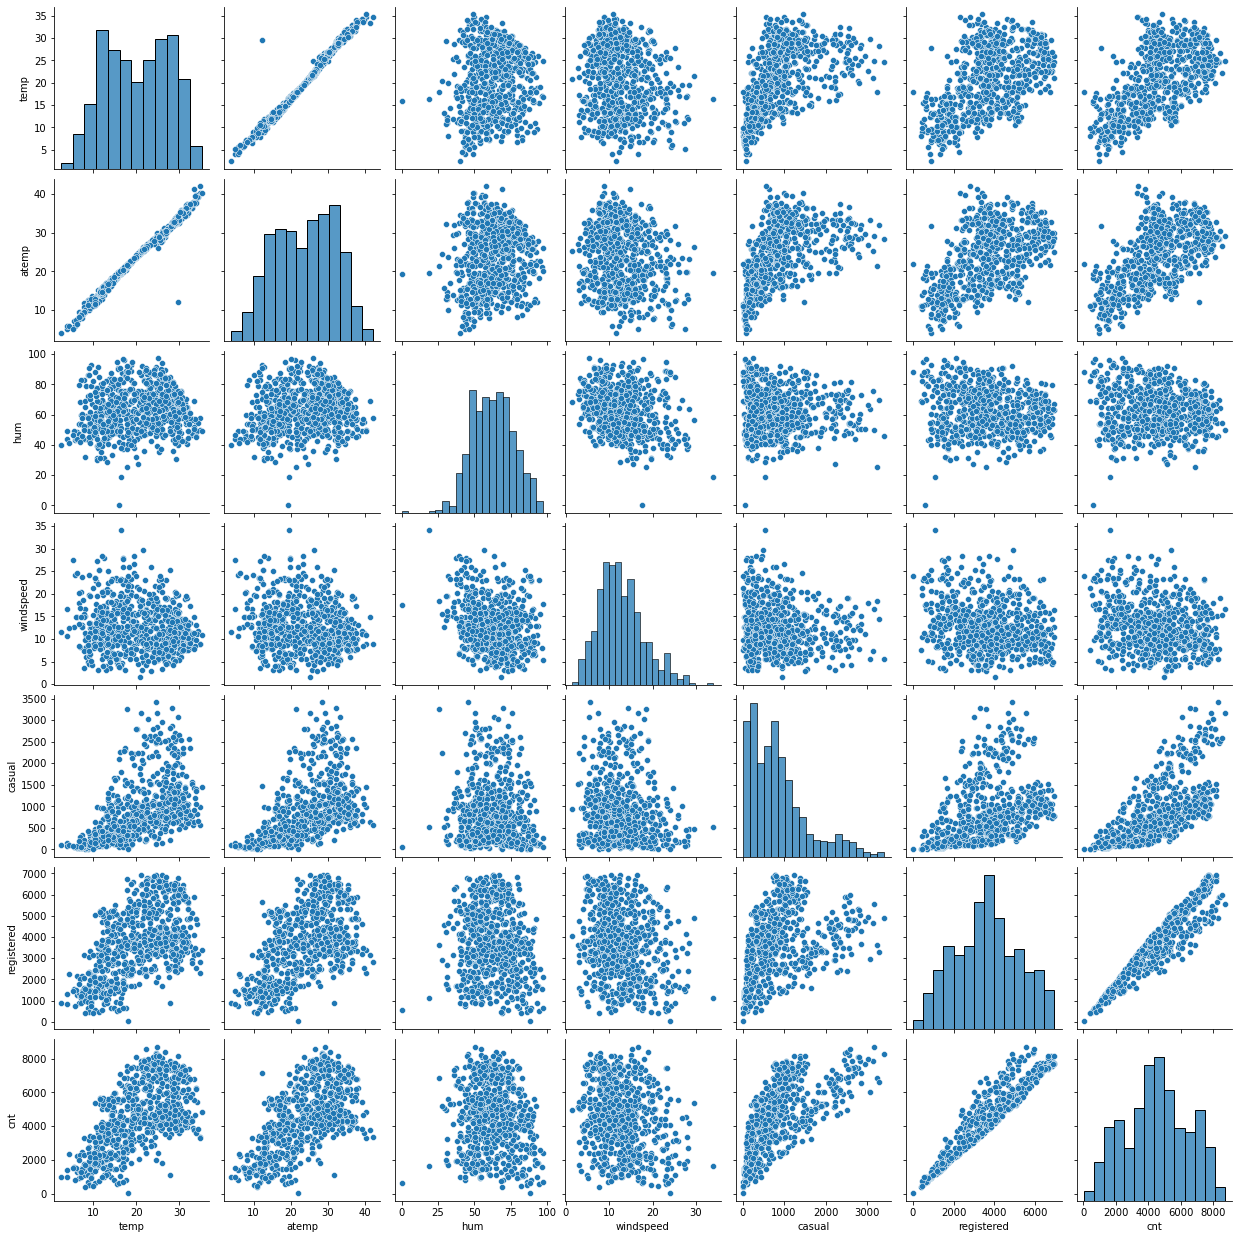

In [14]:
#numeric features
sns.pairplot(data[numeric_feat+["cnt"]])
plt.show()

Observations:
- temp, atemp, casual, registered have relation with the target cnt feature

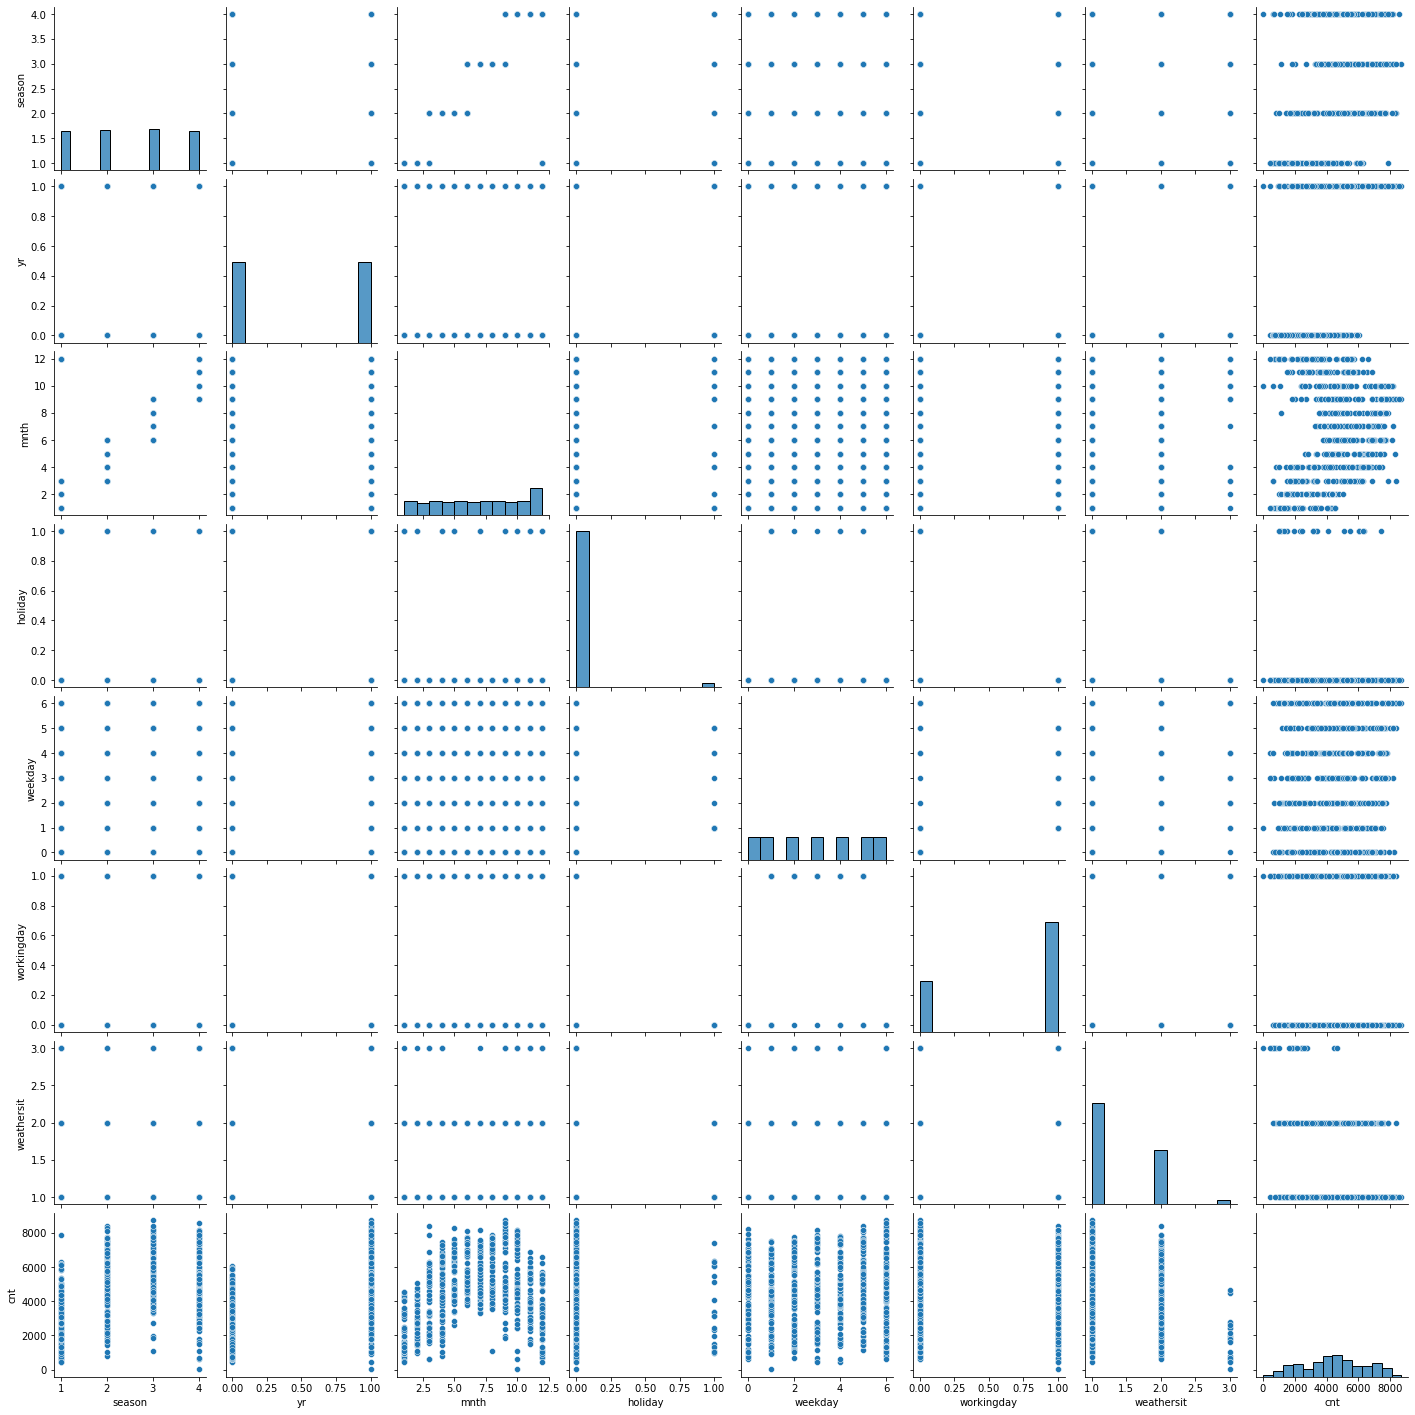

In [15]:
# categorical features
sns.pairplot(data[categorical_feat+["cnt"]])
plt.show()

Observation
- season & month has got relation

### Detecting Outliers

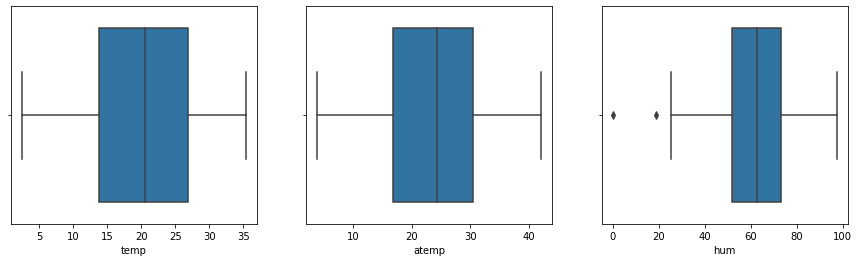

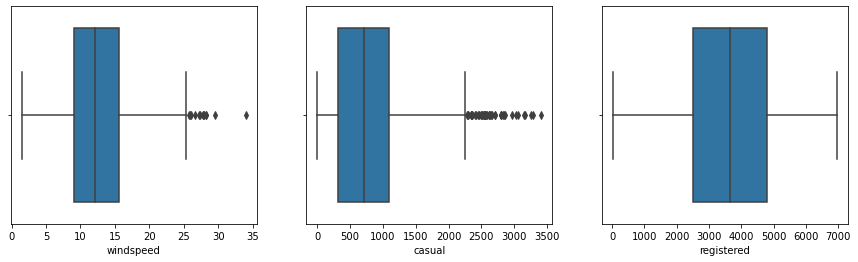

In [16]:
def plot_multiple_box_plots(data, cols, target=None, n_cols=3, n_rows=2):
    
    for i in range(n_rows):
        fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(15, 4))
        for j in range(n_cols):
            try:
                sns.boxplot(x=cols[i*n_cols+j], y=target, data=data,  ax=ax[j])
            except:
                continue
    ## access each axes object via axs.flat
    for a in ax.flat:
        ## check if something was plotted 
        if not bool(a.has_data()):
            fg.delaxes(a) ## delete if nothing is plotted in the axes obj
            
    plt.show()

plot_multiple_box_plots(data, numeric_feat, n_cols=3, n_rows=2)

Observation
- hum, windspeed & casual got outliers

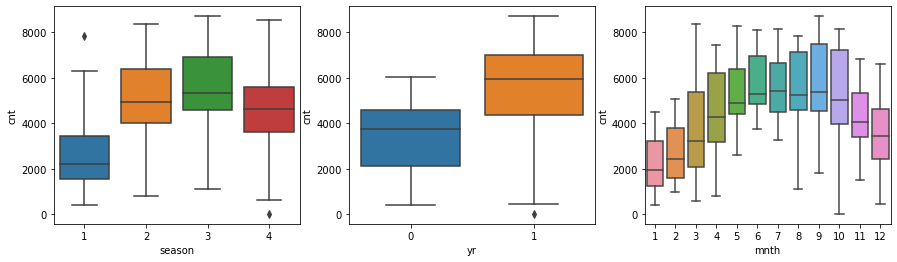

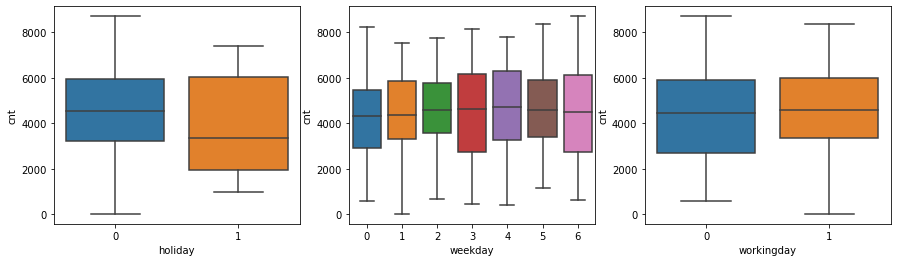

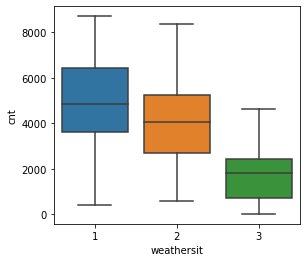

In [17]:
#box plot for categorical features
plot_multiple_box_plots(data, categorical_feat, target, n_cols=3, n_rows=3)

### Dummy Variables : Encode categorical features

In [18]:
# one Hot encoding the categorical features
season_mapping = {1: "spring",
                  2: "summer", 
                  3: "fall", 
                  4: "winter"}


months_mapping = {1: 'jan',
                 2: 'feb',
                 3: 'mar',
                 4: 'apr',
                 5: 'may',
                 6: 'jun',
                 7: 'jul',
                 8: 'aug',
                 9: 'sep',
                 10: 'oct',
                 11: 'nov',
                 12: 'dec'}

weekday_mapping = {6: 'monday',
                   0: 'tuesday',
                   1: 'wednesday',
                   2: 'thursday',
                   3: 'friday',
                   4: 'saturday',
                   5: 'sunday'
                  }

weathersit_mapping ={1: 'clear_partlyCloudy',
                     2: 'mist_cloudy',
                     3: 'lightSnow_lightRain',
                     4: 'heavyRain_icePallets'
                    }

mapping_dict = {'season': season_mapping,
                'mnth': months_mapping,
                'weekday': weekday_mapping,
                'weathersit' : weathersit_mapping
               }

def categorical_encoding(df, col, mapping):
    
    df_tmp = pd.get_dummies(df[col].map(mapping), drop_first=True, prefix=col)
    df = pd.concat([df, df_tmp], axis=1)
    return df


for col in mapping_dict.keys():
    data = categorical_encoding(data, col, mapping_dict[col])
    


### Drop unnecessary features
1. instant - unique ID feature, does not add any information
2. dteday - all the information about date has been already extracted like yr, month, workingday, hoilday etc ...
3. atemp - temp & atemp are highly correlated so one of them can be removed
4. casual, registered - these features are leakage features, and dropping the features

In [19]:
# remove the actually categorical features as they are one hot encoded
data = data.drop(mapping_dict.keys(), axis=1)

# drop the id column 
data = data.drop(['instant','dteday', 'atemp', 'casual', 'registered'], axis=1)

In [20]:
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_lightSnow_lightRain,weathersit_mist_cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Split the data into train & test

In [21]:
#Split the data into train 80%, test 20% 
train, test = train_test_split(data, train_size=0.7, random_state=2022)

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

Train Shape: (510, 29)
Test Shape: (220, 29)


### Rescaling the Features

In [22]:
scaler = MinMaxScaler()

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [23]:
train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_lightSnow_lightRain,weathersit_mist_cloudy
589,1,0,1,0.824514,0.562044,0.250018,0.778945,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
713,1,0,0,0.330249,0.670245,0.170514,0.557286,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
623,1,0,0,0.649029,0.587376,0.127472,0.833273,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
224,0,0,0,0.780902,0.751824,0.450341,0.448992,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
204,0,0,0,0.960541,0.567625,0.337768,0.383315,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Dividing into X and Y sets for the model building

In [24]:
y_train = train.pop('cnt')
X_train = train

## Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.

### Recusive feature elemination (RFE)

In [25]:
# Running RFE to select 15 number of varibles
# Create object
lm = LinearRegression()
# fit model
lm.fit(X_train, y_train)
# run RFE
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

# Select columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_nov', 'mnth_sep',
       'weekday_monday', 'weekday_tuesday', 'weathersit_lightSnow_lightRain',
       'weathersit_mist_cloudy'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [26]:
# Creating X_train_rfe with RFE selected variables
X_train_rfe = X_train[col]

In [27]:
def build_linear_stats_model(X_train_rfe, y_train):
    # Adding a constant variable
    X_train_rfe = sm.add_constant(X_train_rfe)

    lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
    return lm

In [28]:
# Calculate the VIFs for the new model
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [29]:
# Create 1st stats model and look for summary and VIF
lm_1 =  build_linear_stats_model(X_train_rfe,y_train)
print(lm_1.summary())

# Calculate VIF
print(calculate_vif(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.43e-192
Time:                        22:15:02   Log-Likelihood:                 501.93
No. Observations:                 510   AIC:                            -973.9
Df Residuals:                     495   BIC:                            -910.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Dropping the Variable and Updating the Model:**

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. Predictor that has a low p-value is likely to be a meaningful addition to th model. So we can drop variables having p value > 0.05

In [30]:
X_train_new = X_train_rfe.drop(['holiday'], axis=1)
lm_2 = build_linear_stats_model(X_train_new, y_train)

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.43e-192
Time:                        22:15:02   Log-Likelihood:                 501.93
No. Observations:                 510   AIC:                            -973.9
Df Residuals:                     495   BIC:                            -910.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [31]:
X_train_new = X_train_new.drop(['weekday_tuesday'], axis=1)
lm_3 = build_linear_stats_model(X_train_new, y_train)

print(lm_3.summary())
calculate_vif(X_train_new).head(8)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          7.61e-193
Time:                        22:15:03   Log-Likelihood:                 500.70
No. Observations:                 510   AIC:                            -973.4
Df Residuals:                     496   BIC:                            -914.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,Features,VIF
3,hum,22.47
2,temp,15.97
1,workingday,4.80
4,windspeed,4.27
5,season_spring,2.64
6,season_winter,2.55
12,weathersit_mist_cloudy,2.24
0,yr,2.05


Since, hum is having high VIF removing the hum features

In [32]:
X_train_new = X_train_new.drop(['hum'], axis=1)
lm_4 = build_linear_stats_model(X_train_new, y_train)

print(lm_4.summary())
calculate_vif(X_train_new).head(8)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          8.75e-189
Time:                        22:15:03   Log-Likelihood:                 488.24
No. Observations:                 510   AIC:                            -950.5
Df Residuals:                     497   BIC:                            -895.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,Features,VIF
2,temp,7.00
1,workingday,4.62
3,windspeed,4.26
0,yr,2.05
5,season_winter,2.04
4,season_spring,1.85
9,weekday_monday,1.72
7,mnth_nov,1.65


VIF: temp is having highest VIF (7), but during EDA we could see temp has a high correlation with cnt and also its a important varible based on business understanding. So we will keep that varible and look for highest variable which is >5.

We could found hum as next highetst VIF (4.62) which is > 0.5. We will drop the variable and update the model.

In [33]:
X_train_new = X_train_new.drop(['workingday'], axis=1)
lm_5 = build_linear_stats_model(X_train_new, y_train)

print(lm_5.summary())
calculate_vif(X_train_new).head(8)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.34e-184
Time:                        22:15:03   Log-Likelihood:                 474.57
No. Observations:                 510   AIC:                            -925.1
Df Residuals:                     498   BIC:                            -874.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,Features,VIF
1,temp,4.99
2,windspeed,4.17
0,yr,2.05
4,season_winter,1.99
3,season_spring,1.64
6,mnth_nov,1.64
10,weathersit_mist_cloudy,1.53
5,mnth_jul,1.45


The model lm_5 looks good because there are no features which is >0.05 and all the features VIF is less than 3.

### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.


In [34]:
X_train_lm = sm.add_constant(X_train_new)
y_pred_train = lm_5.predict(X_train_lm)        

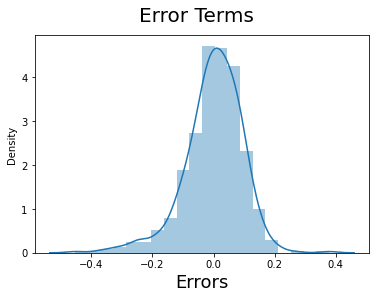

In [35]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

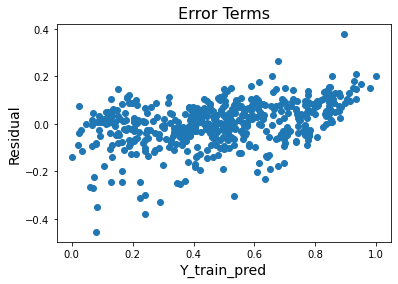

In [36]:
res = y_train-y_pred_train

# look for patterns in residuals (we should not be able to identify)
plt.scatter(y_train, res)
plt.title('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_train_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)   
plt.show()

### Making Predictions
Applying the scaling on the test sets

In [37]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

test[num_vars] = scaler.transform(test[num_vars])

#### Dividing into X_test and y_test

In [38]:
y_test = test.pop('cnt')
X_test = test

In [39]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

y_pred_test = lm_5.predict(X_test_new)

### Model Evaluation

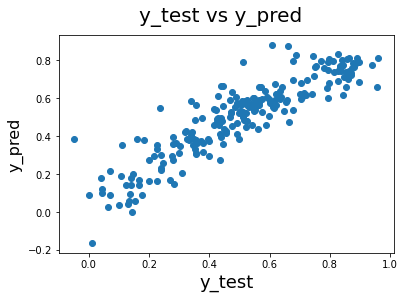

In [40]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [41]:
print("Train R2 Score", r2_score(y_train, y_pred_train))
print("Test R2 Score", r2_score(y_test, y_pred_test))

Train R2 Score 0.8309141281556726
Test R2 Score 0.8078253478923682


In [42]:
lm_5.params

const                             0.194242
yr                                0.242212
temp                              0.489108
windspeed                        -0.088533
season_spring                    -0.119676
season_winter                     0.068769
mnth_jul                         -0.089102
mnth_nov                         -0.053708
mnth_sep                          0.047250
weekday_monday                    0.027363
weathersit_lightSnow_lightRain   -0.275670
weathersit_mist_cloudy           -0.088897
dtype: float64

In [43]:
# list down and check variables of final model
var_final = list(lm_5.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_5.params,3))

Final Selected Variables: ['yr', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_jul', 'mnth_nov', 'mnth_sep', 'weekday_monday', 'weathersit_lightSnow_lightRain', 'weathersit_mist_cloudy']

Coefficent for the variables are:
const                             0.194
yr                                0.242
temp                              0.489
windspeed                        -0.089
season_spring                    -0.120
season_winter                     0.069
mnth_jul                         -0.089
mnth_nov                         -0.054
mnth_sep                          0.047
weekday_monday                    0.027
weathersit_lightSnow_lightRain   -0.276
weathersit_mist_cloudy           -0.089
dtype: float64


**The equation of our best fitted line is:**

*const x (0.194) + yr x (0.242) + temp x (0.489) + windspeed x (-0.089) + season_spring x (-0.12) + season_winter x (0.069) + mnth_jul x (-0.089) + mnth_nov x (-0.054) + mnth_sep x (0.047) + weekday_monday x (0.027) + weathersit_lightSnow_lightRain x (-0.276) + weathersit_mist_cloudy x (-0.089)*

**Based on final model top three features contributing significantly towards explaining the demand are:**

- Temperature (0.489)
- year (0.242)
- weathersit : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (-0.276)